In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
df_covid = pd.read_csv("data/fallecidos_covid.csv", delimiter=";", parse_dates=["FECHA_CORTE", "FECHA_FALLECIMIENTO"])
df_covid.head()

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
0,2024-03-17,2022-02-19,63,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203506.0
1,2024-03-17,2021-05-29,74,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203532.0
2,2024-03-17,2021-06-23,72,FEMENINO,Criterio SINADEF,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203584.0
3,2024-03-17,2021-08-24,85,MASCULINO,Criterio investigación Epidemiológica,TUMBES,TUMBES,TUMBES,240101.0,212541.0
4,2024-03-17,2021-06-27,46,MASCULINO,Criterio virológico,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203665.0


In [4]:
df_covid["Año"] = df_covid["FECHA_FALLECIMIENTO"].dt.year
df_covid["Mes"] = df_covid["FECHA_FALLECIMIENTO"].dt.month_name()


orden_meses = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]
df_covid["Mes"] = pd.Categorical(
    df_covid["Mes"], 
    categories=orden_meses, 
    ordered=True
)

 

df_covid = df_covid.sort_values(by=["Año", "Mes"])
df_covid = df_covid.reset_index(drop=True)



df_covid_fallecidos_por_año_mes = df_covid.groupby(["Año", "Mes"])["UUID"].count().reset_index() 
df_covid_fallecidos_por_año_mes.columns= ["Año", "Mes", "Fallecidos"]

df_covid_fallecidos_por_año_mes.head()

C:\Users\Joan\AppData\Local\Temp\ipykernel_6540\1746833627.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_covid_fallecidos_por_año_mes = df_covid.groupby(["Año", "Mes"])["UUID"].count().reset_index()


,Año,Mes,Fallecidos
0,2020,January,0
1,2020,February,0
2,2020,March,174
3,2020,April,5035
4,2020,May,16073


In [5]:
variable_filtro = "Todos"
if variable_filtro != "Todos" :
    df_filtrado = df_covid_fallecidos_por_año_mes[df_covid_fallecidos_por_año_mes["Año"] == variable_filtro]
else:
    df_filtrado = df_covid_fallecidos_por_año_mes

C:\Users\Joan\AppData\Local\Temp\ipykernel_6540\1221950240.py:4: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax = sns.lineplot(x=df_filtrado["Mes"], y=df_filtrado["Fallecidos"], hue=df_filtrado["Año"],


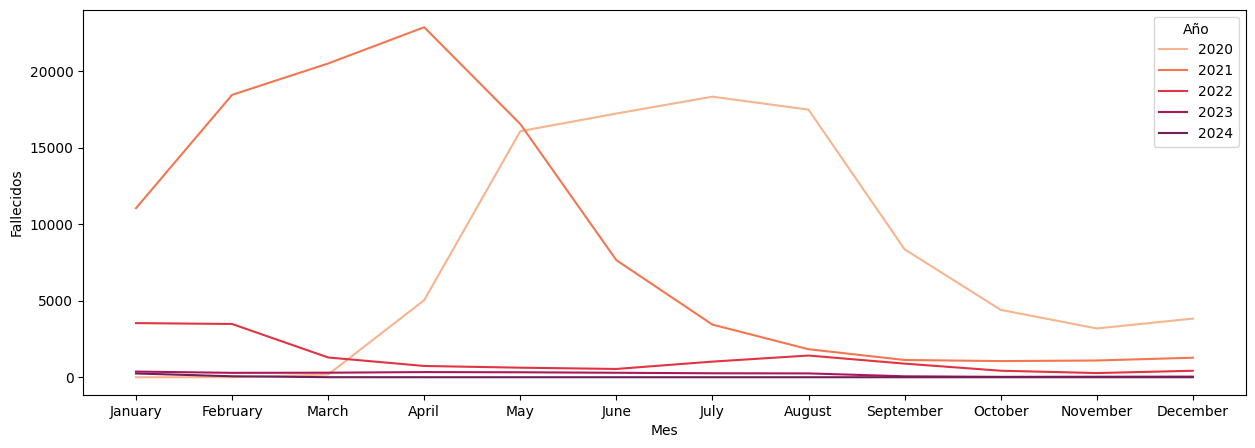

In [6]:
palette = sns.color_palette("rocket_r")

plt.figure(figsize=(15, 5))
ax = sns.lineplot(x=df_filtrado["Mes"], y=df_filtrado["Fallecidos"], hue=df_filtrado["Año"],  
     palette=palette    )

In [16]:
df_covid_año = df_covid[df_covid["Año"]==2021]
df_covid_filtro = (df_covid_año.groupby(["DEPARTAMENTO", "Año"])["UUID"]
                                .count() 
                                .unstack()                             
                                )
df_covid_filtro.head()

Año,2021
DEPARTAMENTO,
AMAZONAS,697
ANCASH,3798
APURIMAC,1156
AREQUIPA,5332
AYACUCHO,1327


In [21]:
df_covid["DEPARTAMENTO"] = df_covid["DEPARTAMENTO"].replace("LIMA METROPOLITANA", "LIMA")

df_covid[df_covid["DEPARTAMENTO"] == "LIMA METROPOLITANA"]

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID,Año,Mes


In [25]:
df_covid[df_covid["DEPARTAMENTO"]=="MASCULINO"]

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID,Año,Mes
220623,2024-03-17,2024-01-20,86,MASCULINO,NotiCovid,MASCULINO,TACNA,TACNA,230101.0,117420.0,2024,January
220801,2024-03-17,2024-01-21,81,MASCULINO,NotiCovid,MASCULINO,HUANCAVELICA,PALCA,90114.0,15162227.0,2024,January


In [26]:
df_covid.loc[df_covid["UUID"] == 117420, "DEPARTAMENTO"]  = df_covid.loc[df_covid["UUID"] == 117420]["DEPARTAMENTO"].replace("MASCULINO", "TACNA")
df_covid.loc[df_covid["UUID"] == 15162227, "DEPARTAMENTO"]  = df_covid.loc[df_covid["UUID"] ==15162227]["DEPARTAMENTO"].replace("MASCULINO", "HUANCAVELICA")

df_covid[df_covid["UUID"].isin([117420, 15162227]) ]

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID,Año,Mes
220623,2024-03-17,2024-01-20,86,MASCULINO,NotiCovid,TACNA,TACNA,TACNA,230101.0,117420.0,2024,January
220801,2024-03-17,2024-01-21,81,MASCULINO,NotiCovid,HUANCAVELICA,HUANCAVELICA,PALCA,90114.0,15162227.0,2024,January
